In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#find avavilable data sets names in seaborn 
print(len(sns.get_dataset_names()))

22


In [3]:
df=sns.load_dataset('flights')
df.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [4]:
#Convert the date to yyyy-mm-dd format in a new column nemaed yearmonth
df['yearMonth']="01-"+df['month'].astype(str)+"-"+df["year"].astype(str)
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearMonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB
None


year month  passengers    yearMonth
0  1949   Jan         112  01-Jan-1949
1  1949   Feb         118  01-Feb-1949
2  1949   Mar         132  01-Mar-1949
3  1949   Apr         129  01-Apr-1949
4  1949   May         121  01-May-1949

In [5]:
#Yearmonth is of type object-we may have problems later,so convert it into datetime
df['yearMonth']=pd.to_datetime("01-"+df['month'].astype(str)+"-"+df["year"].astype(str))
print(df.info())

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB
None
   year month  passengers  yearMonth
0  1949   Jan         112 1949-01-01
1  1949   Feb         118 1949-02-01
2  1949   Mar         132 1949-03-01
3  1949   Apr         129 1949-04-01
4  1949   May         121 1949-05-01


In [6]:
#Make yearmonth column as the dataframe index
df.set_index('yearMonth',inplace=True)
print(df.head())


            year month  passengers
yearMonth                         
1949-01-01  1949   Jan         112
1949-02-01  1949   Feb         118
1949-03-01  1949   Mar         132
1949-04-01  1949   Apr         129
1949-05-01  1949   May         121


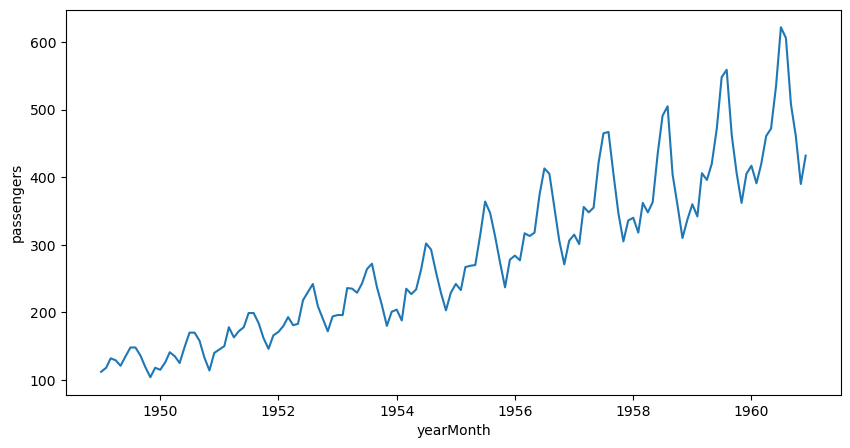

In [7]:
#Visualize the time series
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)
plt.show()

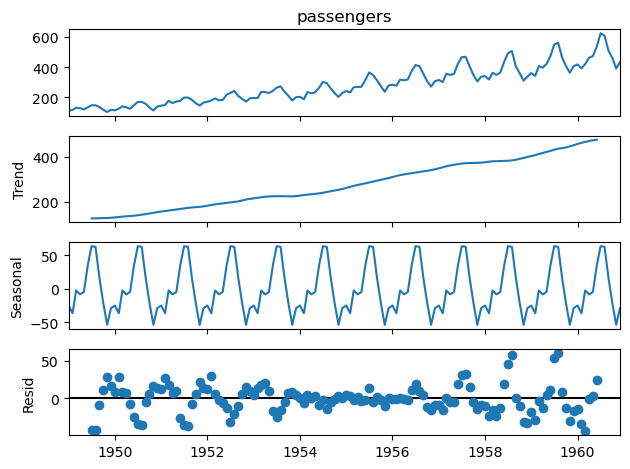

In [8]:
#Check further for seasonality and trend 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df.passengers,period=12)
fig=decomposition.plot()
plt.show()

In [9]:
#We see in our graph two pattern:seasonlity and trend
#check further fro seasonality and trend
#calculate and plot mean and sandard deviatation for 12 moths
df['rollMean']=df.passengers.rolling(window=12).mean()
df['rollstd']=df.passengers.rolling(window=12).std()

print(df['rollMean'])
print(df['rollstd'])

yearMonth
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: rollMean, Length: 144, dtype: float64
yearMonth
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
                ...    
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125
Name: rollstd, Length: 144, dtype: float64


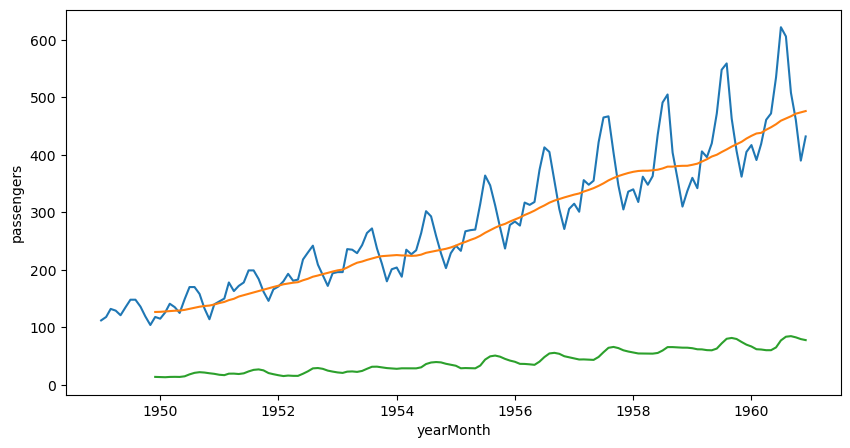

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)
sns.lineplot(data=df,x=df.index,y=df.rollMean)
sns.lineplot(data=df,x=df.index,y=df.rollstd)
plt.show()

In [11]:
#Conclusion:Mean is not stationary 
#Now lets us perform the ADF test
from statsmodels.tsa.stattools import adfuller
adfTest=adfuller(df['passengers'])
print(adfTest)         #Lets us intreprete these values below by converting ito a series
stats =pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used ','number of observations used'])
print(stats)

(0.8153688792060597, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64


In [12]:
#H0:time series is not stationary 
#p-value >=0.05 :Do not reject the nulll hypothesis
#ADF statistuc is less negative (or more positive ) ha the critical value
#Do  not reject the null hypothesis, meanig the series is non-stationary

for key,values in adfTest[4].items():
    print('Critical',key,":",values)

Critical 1% : -3.4816817173418295
Critical 5% : -2.8840418343195267
Critical 10% : -2.578770059171598


In [13]:
#We will se that our test statistic >critical value in all the cases, so we do not reject the null hypothesis. 
#It menans that our data is not stationary

### Time shift



In [14]:
#Just get the passengers column into a new dataframe for easier testing 
air_df=df[['passengers']].copy()      #Double brackets because it is a list within a list 
print(air_df.head())

            passengers
yearMonth             
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


In [15]:
#by default ,shift it by 1 time period(here ,one month)
#Create a new column which will contain the shifted value from passengers column 
air_df['shift']=air_df.passengers.shift(1)
air_df['shiftDiff']=air_df['passengers']-air_df['shift']
print(air_df.head(20))

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118  112.0        6.0
1949-03-01         132  118.0       14.0
1949-04-01         129  132.0       -3.0
1949-05-01         121  129.0       -8.0
1949-06-01         135  121.0       14.0
1949-07-01         148  135.0       13.0
1949-08-01         148  148.0        0.0
1949-09-01         136  148.0      -12.0
1949-10-01         119  136.0      -17.0
1949-11-01         104  119.0      -15.0
1949-12-01         118  104.0       14.0
1950-01-01         115  118.0       -3.0
1950-02-01         126  115.0       11.0
1950-03-01         141  126.0       15.0
1950-04-01         135  141.0       -6.0
1950-05-01         125  135.0      -10.0
1950-06-01         149  125.0       24.0
1950-07-01         170  149.0       21.0
1950-08-01         170  170.0        0.0


### Using Function

In [16]:
#The prrevious code to test stationarity is now in a function 
def test_stationarity(dataFrame,var):
    dataFrame['rollMean']=dataFrame[var].rolling(window=12).mean()
    dataFrame['rollstd']=dataFrame[var].rolling(window=12).std()

    from statsmodels.tsa.stattools import adfuller
    adfTest=adfuller(dataFrame[var])
    stats=pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)

    for key,values in adfTest[4].items():
          print('Criticality',key,":",values)

    plt.figure(figsize=(10,5))
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollstd')
    plt.show()

C:\Users\dbda\AppData\Local\Temp\ipykernel_17668\2789744233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']=dataFrame[var].rolling(window=12).mean()
C:\Users\dbda\AppData\Local\Temp\ipykernel_17668\2789744233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollstd']=dataFrame[var].rolling(window=12).std()


Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64
Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


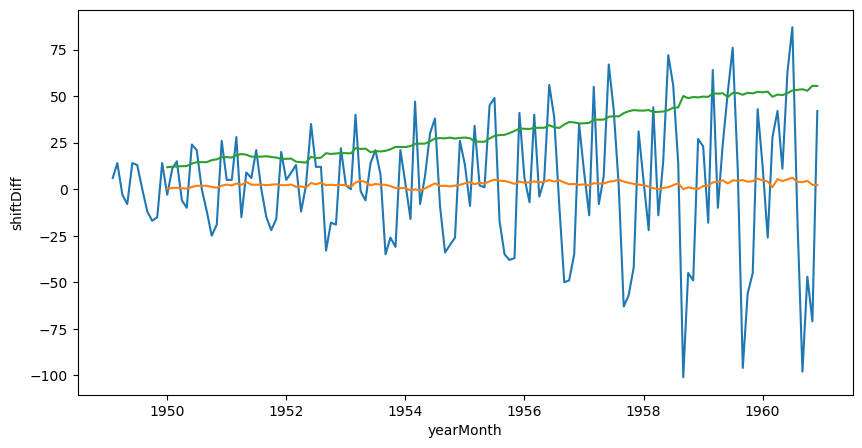

passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118    NaN        NaN
1949-03-01         132  112.0       20.0
1949-04-01         129  118.0       11.0
1949-05-01         121  132.0      -11.0
1949-06-01         135  129.0        6.0
1949-07-01         148  121.0       27.0
1949-08-01         148  135.0       13.0
1949-09-01         136  148.0      -12.0
1949-10-01         119  148.0      -29.0
1949-11-01         104  136.0      -32.0
1949-12-01         118  119.0       -1.0
1950-01-01         115  104.0       11.0
1950-02-01         126  118.0        8.0
1950-03-01         141  115.0       26.0
1950-04-01         135  126.0        9.0
1950-05-01         125  141.0      -16.0
1950-06-01         149  135.0       14.0
1950-07-01         170  125.0       45.0
1950-08-01         170  149.0       21.0

In [17]:
#Test stationarity
test_stationarity(air_df.dropna(),'shiftDiff')
#p value is just close to 0.05 ,so let us try a shift of 2
#By default, shift is by 1 time period(here,onemoth)
#Create a new column which will contain the shifted value from passengers column
air_df['shift']=air_df.passengers.shift(2)
air_df['shiftDiff']=air_df['passengers']-air_df['shift']
air_df.head(20)

C:\Users\dbda\AppData\Local\Temp\ipykernel_17668\2789744233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean']=dataFrame[var].rolling(window=12).mean()
C:\Users\dbda\AppData\Local\Temp\ipykernel_17668\2789744233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollstd']=dataFrame[var].rolling(window=12).std()


Test Statistic                  -2.961695
p-value                          0.038630
#lags used                      11.000000
number of observations used    130.000000
dtype: float64
Criticality 1% : -3.4816817173418295
Criticality 5% : -2.8840418343195267
Criticality 10% : -2.578770059171598


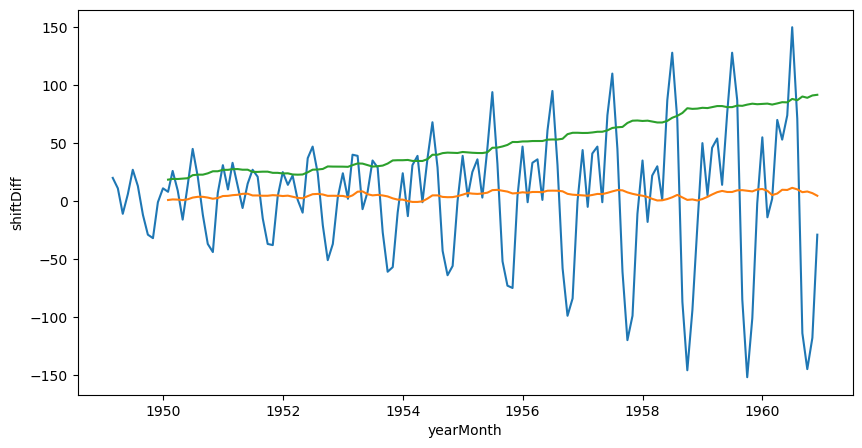

In [18]:
#Test sationary 
test_stationarity(air_df.dropna(),'shiftDiff')

In [19]:
#-2.96 <-2.88 and p value =0/03 which is <0.05, so,
#now test statistic < critical value ....so now we reject H0
#Conclusion:The data has become some what stationary


### ARIMA

In [20]:
#IN GOOGLE COLAB,you may need to !pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [21]:
#create columns for one month and one year lagged data
air_df['firstDiff']=air_df['passengers'].diff()

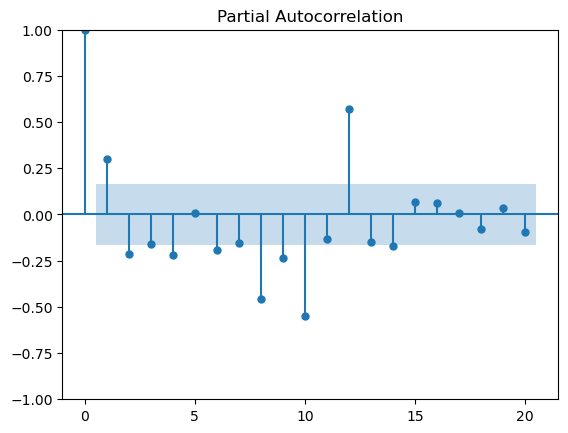

In [22]:
plot_pacf(air_df['firstDiff'].dropna(),lags=20)
plt.show()

#Shaded area is insignificantarea
#PACF gives us the auto regressive values(i.e. p-Refer to the slides)
#First 'p' is 1 (the x-axis coordinate),whose value is ~0.31 (the y-axis coordinate)
#So,significant p values are 1,2,3,4,6,etc

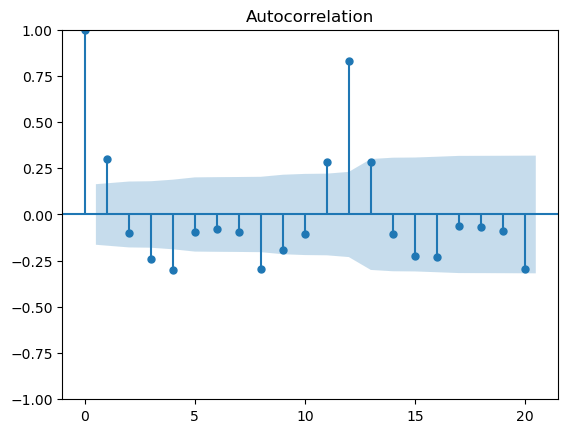

In [23]:
#now let us take this as p and find q,for which we need ACF 
plot_acf(air_df['firstDiff'].dropna(),lags=20)
plt.show()
#Results of acf are similar to that of pacf
#intepretation: We got q.Significant q values are 1,3,4,8,etc

In [24]:
#Let us take p-1,q=3(both are significant) and d=2(already known)
#Build ARIMA model
train=air_df[:round(len(air_df)*70/100)]#Take the first 70% data
print(train.tail()) #Just to check where is ends
test=air_df[round(len(air_df)*70/100):] #take the last 30% data,starting from 715
print(test.head()) #Just to check where it starts

            passengers  shift  shiftDiff  firstDiff
yearMonth                                          
1957-01-01         315  271.0       44.0        9.0
1957-02-01         301  306.0       -5.0      -14.0
1957-03-01         356  315.0       41.0       55.0
1957-04-01         348  301.0       47.0       -8.0
1957-05-01         355  356.0       -1.0        7.0
            passengers  shift  shiftDiff  firstDiff
yearMonth                                          
1957-06-01         422  348.0       74.0       67.0
1957-07-01         465  355.0      110.0       43.0
1957-08-01         467  422.0       45.0        2.0
1957-09-01         404  465.0      -61.0      -63.0
1957-10-01         347  467.0     -120.0      -57.0


In [25]:
model=ARIMA(train['passengers'],order=(4,2,3)) #Parameters: p,d,q
model_fit=model.fit()
prediction=model_fit.predict(start=test.index[0],end=test.index[-1])
air_df['arimaPred']=prediction
print(air_df.tail())



C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\New folder\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


            passengers  shift  shiftDiff  firstDiff   arimaPred
yearMonth                                                      
1960-08-01         606  535.0       71.0      -16.0  451.070382
1960-09-01         508  622.0     -114.0      -98.0  455.833274
1960-10-01         461  606.0     -145.0      -47.0  456.980858
1960-11-01         390  508.0     -118.0      -71.0  458.487440
1960-12-01         432  461.0      -29.0       42.0  462.915579


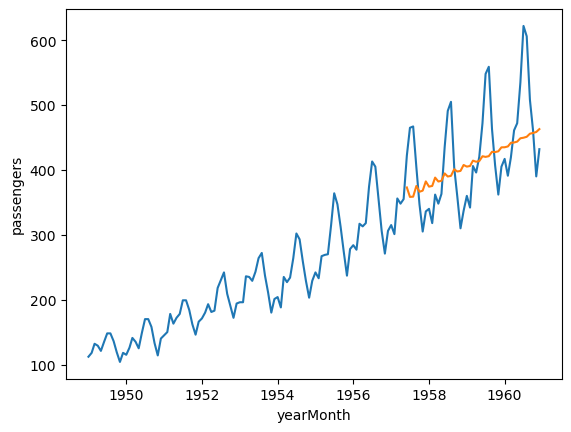

In [26]:
#Plot
sns.lineplot(data=air_df,x=air_df.index,y='passengers')
sns.lineplot(data=air_df,x=air_df.index,y='arimaPred')
plt.show()

In [27]:
#Conclusion: The ARIMA prediction is not good

### SARIMAX

In [28]:
#Create columns for one month and one year lagged data
air_df['firstDiff']=air_df['passengers'].diff()
air_df['Diff12']=air_df['passengers'].diff(12)
air_df.head(20)

passengers  shift  shiftDiff  firstDiff  arimaPred  Diff12
yearMonth                                                             
1949-01-01         112    NaN        NaN        NaN        NaN     NaN
1949-02-01         118    NaN        NaN        6.0        NaN     NaN
1949-03-01         132  112.0       20.0       14.0        NaN     NaN
1949-04-01         129  118.0       11.0       -3.0        NaN     NaN
1949-05-01         121  132.0      -11.0       -8.0        NaN     NaN
1949-06-01         135  129.0        6.0       14.0        NaN     NaN
1949-07-01         148  121.0       27.0       13.0        NaN     NaN
1949-08-01         148  135.0       13.0        0.0        NaN     NaN
1949-09-01         136  148.0      -12.0      -12.0        NaN     NaN
1949-10-01         119  148.0      -29.0      -17.0        NaN     NaN
1949-11-01         104  136.0      -32.0      -15.0        NaN     NaN
1949-12-01         118  119.0       -1.0       14.0        NaN     NaN
1950-01-01         115  104.0       11.0       -3.0        NaN     3.0
1950-02-01         126  118.0        8.0       11.0        NaN     8.0
1950-03-01         141  115.0       26.0       15.0        NaN     9.0
1950-04-01         135  126.0        9.0       -6.0        NaN     6.0
1950-05-01         125  141.0      -16.0      -10.0        NaN     4.0
1950-06-01         149  135.0       14.0       24.0        NaN    14.0
1950-07-01         170  125.0       45.0       21.0        NaN    22.0
1950-08-01         170  149.0       21.0        0.0        NaN    22.0

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

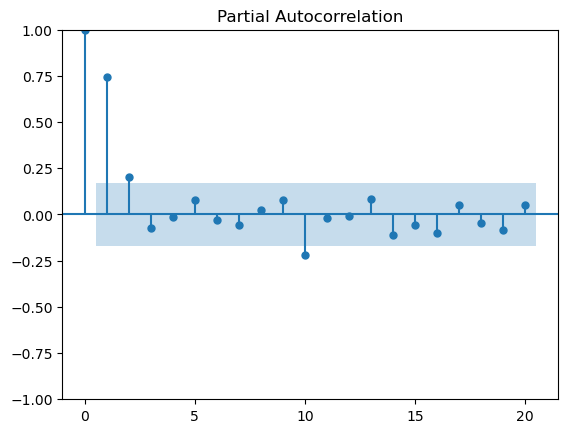

In [30]:
plot_pacf(air_df['Diff12'].dropna(),lags=20)
plt.show()

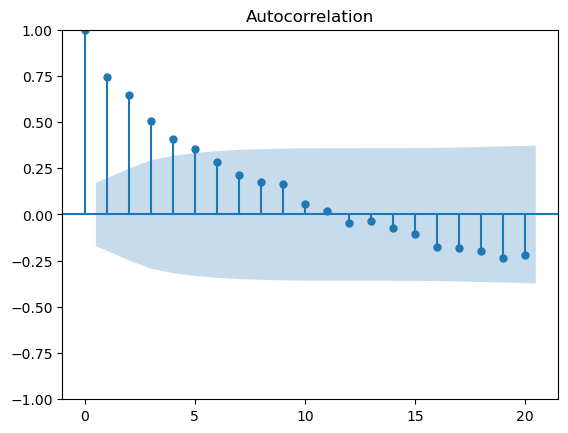

In [31]:
plot_acf(air_df['Diff12'].dropna(),lags=20)
plt.show()

In [32]:
train=air_df[:round(len(air_df)*70/100)]  # take the first 70%data
test=air_df[round(len(air_df)*70/100):] #take the last 30% data,starting from 71%
print(test.head()) #Just to check where it starts

            passengers  shift  shiftDiff  firstDiff   arimaPred  Diff12
yearMonth                                                              
1957-06-01         422  348.0       74.0       67.0  372.969257    48.0
1957-07-01         465  355.0      110.0       43.0  358.384558    52.0
1957-08-01         467  422.0       45.0        2.0  358.764944    62.0
1957-09-01         404  465.0      -61.0      -63.0  375.285354    49.0
1957-10-01         347  467.0     -120.0      -57.0  366.321786    41.0


In [33]:
#now SARIMAX prediction
model=SARIMAX(train['passengers'],order=(1,2,1),seasonal_order=(1,2,1,12)) #Parameters: p,d,q
model_fit=model.fit()
prediction=model_fit.predict(start=test.index[0],end=test.index[-1])
air_df['sarimaxPred']=prediction
print(air_df.tail())




C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\New folder\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            passengers  shift  shiftDiff  firstDiff   arimaPred  Diff12  \
yearMonth                                                                 
1960-08-01         606  535.0       71.0      -16.0  451.070382    47.0   
1960-09-01         508  622.0     -114.0      -98.0  455.833274    45.0   
1960-10-01         461  606.0     -145.0      -47.0  456.980858    54.0   
1960-11-01         390  508.0     -118.0      -71.0  458.487440    28.0   
1960-12-01         432  461.0      -29.0       42.0  462.915579    27.0   

            sarimaxPred  
yearMonth                
1960-08-01   588.761531  
1960-09-01   518.376159  
1960-10-01   452.602418  
1960-11-01   402.822979  
1960-12-01   450.801442  


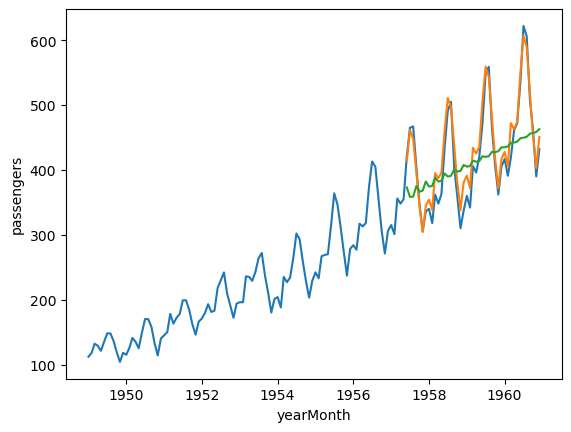

In [34]:
#Data looks better 
#Plot
sns.lineplot(data=air_df,x=air_df.index,y='passengers')
sns.lineplot(data=air_df,x=air_df.index,y='sarimaxPred')
sns.lineplot(data=air_df,x=air_df.index,y='arimaPred')
plt.show()

In [35]:
#Compared to ARIMA ,SARIMAX is much better 
#Future prediction
#Firts check the last date in our dataset
print(air_df.tail())

            passengers  shift  shiftDiff  firstDiff   arimaPred  Diff12  \
yearMonth                                                                 
1960-08-01         606  535.0       71.0      -16.0  451.070382    47.0   
1960-09-01         508  622.0     -114.0      -98.0  455.833274    45.0   
1960-10-01         461  606.0     -145.0      -47.0  456.980858    54.0   
1960-11-01         390  508.0     -118.0      -71.0  458.487440    28.0   
1960-12-01         432  461.0      -29.0       42.0  462.915579    27.0   

            sarimaxPred  
yearMonth                
1960-08-01   588.761531  
1960-09-01   518.376159  
1960-10-01   452.602418  
1960-11-01   402.822979  
1960-12-01   450.801442  


In [36]:
#MA:month start frequency 
#create a dataframe to hold index values from 01.01.61 to 01.12.62
futureDate =pd.DataFrame(pd.date_range(start='1961-01-01',end='1962-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
print(futureDate.head())

Empty DataFrame
Columns: []
Index: [1961-01-01 00:00:00, 1961-02-01 00:00:00, 1961-03-01 00:00:00, 1961-04-01 00:00:00, 1961-05-01 00:00:00]


In [37]:
#predict and print
print(model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]))

1961-01-01    462.567076
1961-02-01    437.559008
1961-03-01    508.356962
1961-04-01    497.736852
1961-05-01    511.040753
1961-06-01    591.681183
1961-07-01    652.341214
1961-08-01    632.033744
1961-09-01    555.855998
1961-10-01    485.358250
1961-11-01    432.005433
1961-12-01    482.569692
1962-01-01    494.971542
1962-02-01    466.813665
1962-03-01    541.962827
1962-04-01    530.337076
1962-05-01    545.063311
1962-06-01    630.747653
1962-07-01    694.859667
1962-08-01    672.409481
1962-09-01    590.339548
1962-10-01    515.028298
1962-11-01    458.053270
1962-12-01    511.105831
Freq: MS, Name: predicted_mean, dtype: float64


#plot 
air_df.dropna()
#Data looks better 
#Plot
sns.lineplot(data=air_df,x=air_df.index,y='passengers')
sns.lineplot(data=air_df,x=air_df.index,y='sarimaxPred')
sns.lineplot(data=air_df,x=air_df.index,y='arimaPred')
plt.show()
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')
plt.show()

### Model Evaluation


In [38]:
air_df=air_df.dropna()

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [40]:
#arima evaluation
mae=mean_absolute_error(air_df['passengers'],air_df['arimaPred'])
rmse=mean_squared_error(air_df['passengers'],air_df['arimaPred'],squared=False)
mape=(abs((air_df['passengers']-air_df['arimaPred'])/air_df['arimaPred']).mean())*100
r2=r2_score(air_df['passengers'],air_df['arimaPred'])
print(f"ARIMA MAE :{mae},RMSE:{rmse},MAPE:{mape}%,R^2:{r2}")

ARIMA MAE :54.90552696910386,RMSE:68.83551985962892,MAPE:13.423440850137814%,R^2:0.19362686359198067


C:\ProgramData\New folder\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
#On Average the predictions are offf by ~55.37 passengers from the actual number of passengers.
#Lower values indicate better model performance.
#RMSE gives a measure of error that penalizes large deviations more than MAE.
#In this case,theeroor maginitude is ~69.10 passengers.Like MAE,lower values indicate better performance.
# the model predictions are,on average ~13.55% off from the actual passengers counts.
#lower MAPE indicates better accuracy and values under 10% are typically considered good for forecasting problems
#r^2 provides a proportions of variance explained by the model a value closer to 1 indicates a better fit..

In [44]:
#Sarimax Evaluation
mae=mean_absolute_error(air_df['passengers'],air_df['sarimaxPred'])
rmse=mean_squared_error(air_df['passengers'],air_df['sarimaxPred'],squared=False)
mape=(abs((air_df['passengers']-air_df['sarimaxPred'])/air_df['sarimaxPred']).mean())*100
r2=r2_score(air_df['passengers'],air_df['sarimaxPred'])
print(f"SARIMAX MAE :{mae},RMSE:{rmse},MAPE:{mape}%,R^2:{r2}")

SARIMAX MAE :18.49343038742832,RMSE:22.041404789007153,MAPE:4.354718500925914%,R^2:0.9173221072962853


C:\ProgramData\New folder\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
#On average,the predictions are off by ~18.49 passengers from the actual number of passengers
#Lower values indicate better model performance.
#RMSE gives a measure of error that penalizes large deviations more than MAE.
#In this case,theeroor maginitude is ~22.03 passengers.Like MAE,lower values indicate better performance.
# the model predictions are,on average ~4.35% off from the actual passengers counts.
#lower MAPE indicates better accuracy and values under 10% are typically considered good for forecasting problems
#r^2 provides a proportions of variance explained by the model a value closer to 1 indicates a better fit.